In [1]:
library('clusterProfiler')



clusterProfiler v3.18.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [23]:
data <- read.csv('KO差异分析.tsv', sep='\t')
data <- data[which(data$P.Value<0.05),]
head(data)
dim(data)

,X,ID,KO,N_control,N_disease,AveExpr_control,AveExpr_disease,FC,P.Value,adj.P.Val,logFC
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,K11690,K11690,"K11690: C4-dicarboxylate transporter, DctM subunit",72,14,0.000223455,0.000056800,0.25428238,0.000046900,0.0626037,-1.975496585
2,K19510,K19510,K19510: NO_NAME,72,14,0.000086300,0.000004680,0.05425648,0.000057200,0.0626037,-4.204060826
3,K02278,K02278,K02278: prepilin peptidase CpaA,72,14,0.000203865,0.000048000,0.23550752,0.000061600,0.0626037,-2.086154943
4,K01209,K01209,K01209: alpha-N-arabinofuranosidase [EC:3.2.1.55],72,14,0.000619192,0.000179432,0.28978495,0.000076900,0.0626037,-1.786945451
5,K02172,K02172,K02172: bla regulator protein blaR1,72,14,0.000135228,0.000031100,0.22979122,0.000076900,0.0626037,-2.121604401
6,K08978,K08978,K08978: putative membrane protein,72,14,0.000294170,0.000068500,0.23292157,0.000102905,0.0626037,-2.102083848


[1] 613  11

In [7]:
path2name <- read.csv('KEGG_pathways.csv')
head(path2name)
path2name <- path2name[, c('ID', 'Name')]
path2ko <- read.csv('KEGG_path2ko.csv')
path2ko <- path2ko[, c('Pathway', 'KO')]

,X,AClass,BClass,ID,Name
,<chr>,<chr>,<chr>,<chr>,<chr>
1,map00515,Metabolism,Glycan biosynthesis and metabolism,map00515,Mannose type O-glycan biosynthesis
2,map05130,Human Diseases,Infectious disease: bacterial,map05130,Pathogenic Escherichia coli infection
3,map04621,Organismal Systems,Immune system,map04621,NOD-like receptor signaling pathway
4,map00254,Metabolism,Biosynthesis of other secondary metabolites,map00254,Aflatoxin biosynthesis
5,map04923,Organismal Systems,Endocrine system,map04923,Regulation of lipolysis in adipocytes
6,map00563,Metabolism,Glycan biosynthesis and metabolism,map00563,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis


In [8]:
e <- enricher(data$ID,TERM2GENE = path2ko, TERM2NAME = path2name, 
              pAdjustMethod = 'BH', pvalueCutoff = 0.05, qvalueCutoff = 0.05)

wrong orderBy parameter; set to default `orderBy = "x"`



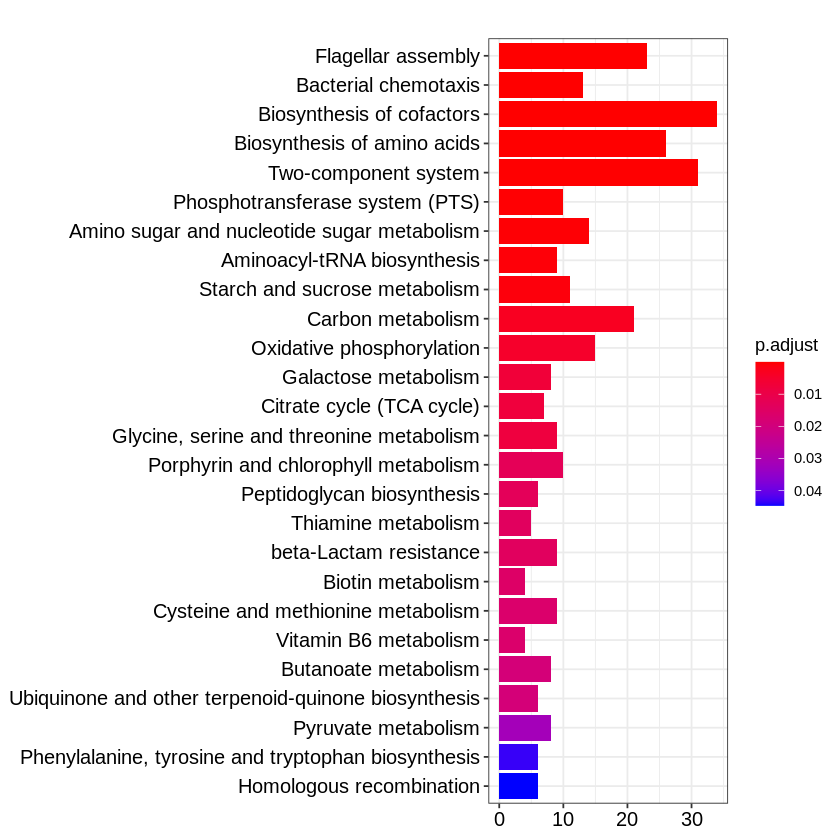

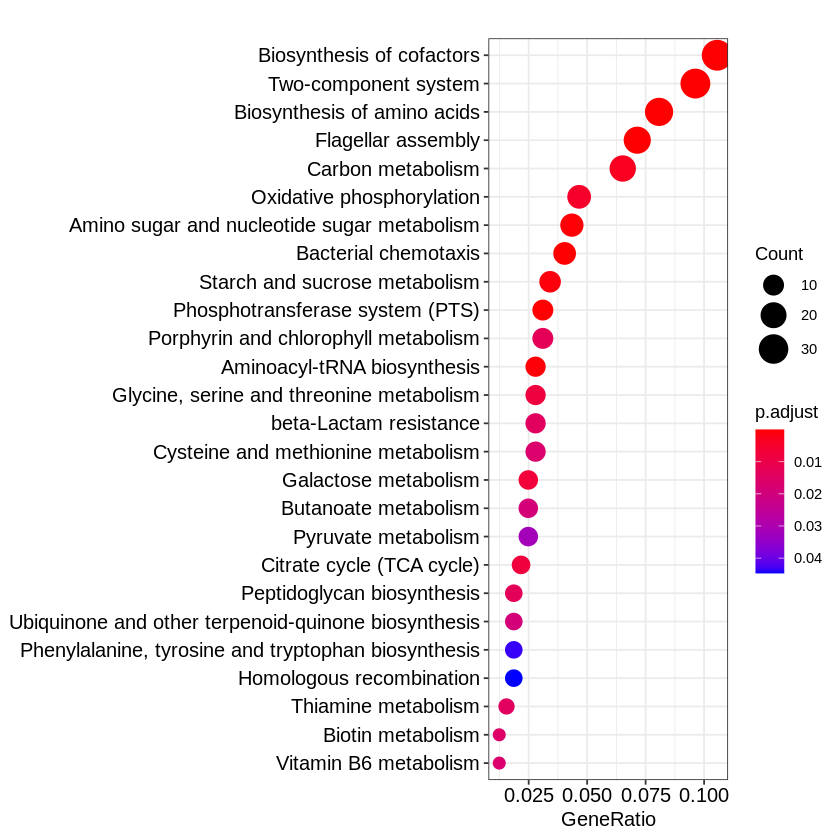

In [9]:
barplot(e, showCategory = 30)
dotplot(e, showCategory = 30)

In [14]:
e <- enricher(data$ID,TERM2GENE = path2ko, TERM2NAME = path2name, 
              pAdjustMethod = 'BH', pvalueCutoff = 1, qvalueCutoff = 1)
write.csv(e, paste('clusterprofile(enricher).csv', sep ="\t"))

# GSEA

In [34]:
data_sort <- data %>% arrange(desc(FC))
kos <- log2(data_sort$FC)
names(kos) <- data_sort$ID
e <- GSEA(kos, TERM2GENE = path2ko, TERM2NAME = path2name, 
          verbose=F, pvalueCutoff = 1)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.49% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


wrong orderBy parameter; set to default `orderBy = "x"`



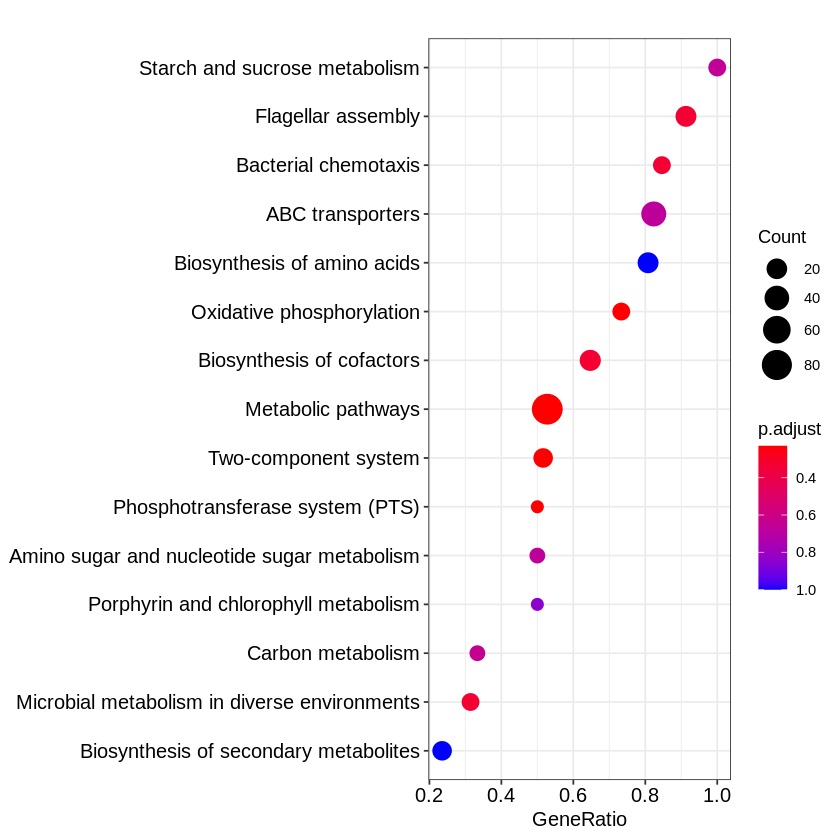

In [38]:
#barplot(e, showCategory = 30)
dotplot(e, showCategory = 30)

In [43]:
e <- GSEA(kos, TERM2GENE = path2ko, TERM2NAME = path2name,
        pvalueCutoff = 100)
write.csv(e, paste('clusterprofile(GSEA).csv', sep ="\t"))

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.49% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(...):
“There were 1 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
leading edge analysis...

done...

